In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML

css = open("style-table.css").read() + open("style-notebook.css").read()
HTML("<style>{}</style>".format(css))

In [3]:
titles = pd.read_csv("data/titles.csv")
titles.head()

,title,year
0,#1 Serial Killer,2013
1,#211,2018
2,#5,2013
3,#50Fathers,2015
4,#66,2015


In [4]:
cast = pd.read_csv("data/cast.csv")
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


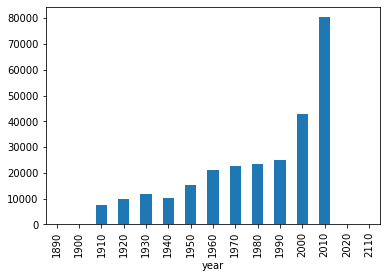

In [5]:
# Using groupby() (and not value_counts), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t.year // 10 * 10).size().plot(kind="bar");

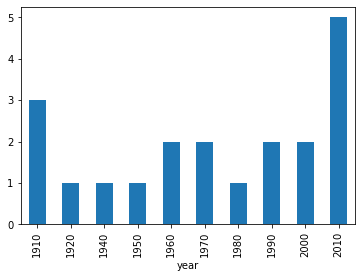

In [6]:
# Use groupby() (and not value_counts) to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == "Hamlet"]
t.groupby(t.year // 10 * 10).size().plot(kind="bar");

In [7]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(["year", "type"]).size()

year  type   
1950  actor      719
      actress    342
1951  actor      753
      actress    359
1952  actor      720
      actress    364
1953  actor      756
      actress    374
1954  actor      727
      actress    384
1955  actor      748
      actress    349
1956  actor      783
      actress    382
1957  actor      876
      actress    387
1958  actor      849
      actress    392
1959  actor      869
      actress    391
dtype: int64

In [8]:
# In the 1950s decade taken as a whole,
# how many total roles were available to actors,
# and how many to actresses, for each "n" number 1 through 5?

c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(["n", "type"]).size()

n    type   
1.0  actor      7800
     actress    3724
2.0  actor      5532
     actress    5438
3.0  actor      6624
     actress    3852
4.0  actor      6601
     actress    3495
5.0  actor      6581
     actress    3168
dtype: int64

In [9]:
# Use groupby() to determine how many roles are listed
# for each of the "Peter Pan" movies.

c = cast
c = c[c.title == "Peter Pan"]
c = c.sort_values("n").groupby(["year"])[["n"]].count()
c

,n
year,
1924,25
1953,11
2003,52


In [10]:
# List, in order by year, each of the films
# in which Frank Oz has played more than 1 role.

c = cast
c = c[c.name == "Frank Oz"]
g = c.groupby(["year", "title"]).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

In [11]:
# List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c.name == "Frank Oz"]
g = c.groupby(["character"]).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64